Uspešno nastavljene nastavitve


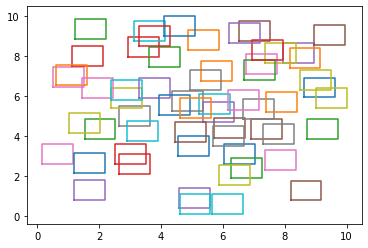

[4.0, (7.353627373541062, 7.814283361455649), [28, 36, 42, 53]]

In [2]:
# Nastavitve programa (potem vse ostalo sam izračuna)
# Tukaj nastavimo število točk in omejitve za x in y

n = 60
x_min = 0
x_max = 10
y_min = 0
y_max = 10

if n <= 0:
    print("Napaka: število kvadratov mora biti pozitivno")
elif x_min >= x_max or y_min >= y_max:
    print("Napaka: napačno nastavljeni parametri")
else:
    print("Uspešno nastavljene nastavitve")

###################################################

import random
from matplotlib.pyplot import plot, axis, show,axes
import matplotlib.pyplot as plt

def nakljucne_tocke(x_min, x_max, y_min, y_max, n):
    #Da seznam n točk v koordinatnem sistemu na intervalu [x_min,x_max]x[y_min,y_max]
    rangeX = (x_min, x_max-1)
    rangeY = (y_min, y_max-1)
    points = []
    i = 0
    while i<n:
        x = random.uniform(*rangeX) 
        y = random.uniform(*rangeY)
        points.append([x,y])
        i += 1
    return points


seznam_tock = nakljucne_tocke(x_min, x_max, y_min, y_max, n)

def generiranje_kvadrata(tocka): # tocka je seznam [ , ]
    #generira še druge tri vogale kvadrata in jih poveže, da to nariše potrebujemo  ukaz plt.show()
    x0 = tocka[0]
    y0 = tocka[1]
    x1 = x0 + 1
    x2 = x1
    x3 = x0
    y1 = y0
    y2 = y0 + 1
    y3 = y2
    return plot([x0, x1, x2, x3, x0], [y0, y1, y2, y3, y0])

seznam_slik = []
for i in range(0,len(seznam_tock)):
    tocka = seznam_tock[i]
    seznam_slik.append(generiranje_kvadrata(tocka))

for slika in seznam_slik:    #to pokaže končno sliko vseh zgenereranih enotskih kvadratov
     plt.plot()
plt.show()

def koordinate_kvadrata(tocka):
    x0 = tocka[0]
    y0 = tocka[1]
    x1 = x0 + 1
    x2 = x1
    x3 = x0
    y1 = y0
    y2 = y0 + 1
    y3 = y2
    return [[x0,y0], [x1,y1], [x2,y2], [x3,y3]]

seznam_kvadratov = []   #seznam kvadratov oz. točk, ki generirajo prej narisane kvadrate
for i in seznam_tock:
    seznam_kvadratov.append(koordinate_kvadrata(i))


def najvecje_dotikanje(seznam_tock): # kot vhod dobiva seznam spodnjih levih oglišč
    n = len(seznam_tock)
    x_min = min(x for x, y in seznam_tock)
    x_max = max(x for x, y in seznam_tock)
    y_min = min(y for x, y in seznam_tock)
    y_max = max(y for x, y in seznam_tock)

    p = MixedIntegerLinearProgram(maximization=True) # iščeva točko, ki se dotika največ kvadratov
    z = p.new_variable(binary=True) #z_i = 1 če tocka (x,y) v kvadratu i
    p.set_objective(sum(z[i] for i in range(n))) # številčenje naj gre kar od 0 do n-1
    for i, (x_i, y_i) in enumerate(seznam_tock): # za realni spremenljivki x, y indeksiramo kar p
        p.add_constraint(p['x'] + (1-z[i])*(x_max - x_min) >= x_i)
        p.add_constraint(p['x'] - (1-z[i])*(x_max - x_min) <= x_i + 1)
        p.add_constraint(p['y'] + (1-z[i])*(y_max - y_min) >= y_i)
        p.add_constraint(p['y'] - (1-z[i])*(y_max - y_min) <= y_i + 1)

    stevilo = p.solve()
    x, y = p.get_values(p['x']), p.get_values(p['y'])
    kvadrati = [k for k, v in p.get_values(z).items() if v == 1]
    return [stevilo, (x, y), kvadrati] # vrnemo število dotikanj, koordinato točke in seznam indeksov kvadratov, ki se jih dotika

najvecje_dotikanje(seznam_tock)

In [3]:
seznam_kvadratov
kvadrati = najvecje_dotikanje(seznam_tock)[2]
for i in kvadrati:
    print(seznam_kvadratov[i])


[[7.353627373541062, 7.632965066053715], [8.353627373541062, 7.632965066053715], [8.353627373541062, 8.632965066053714], [7.353627373541062, 8.632965066053714]]
[[6.741015107338067, 7.09998750401903], [7.741015107338067, 7.09998750401903], [7.741015107338067, 8.09998750401903], [6.741015107338067, 8.09998750401903]]
[[6.683834844851964, 6.825709841053561], [7.683834844851964, 6.825709841053561], [7.683834844851964, 7.825709841053561], [6.683834844851964, 7.825709841053561]]
[[6.941917421925008, 7.814283361455649], [7.941917421925008, 7.814283361455649], [7.941917421925008, 8.814283361455649], [6.941917421925008, 8.814283361455649]]


In [4]:
import time
#kako se spreminja čas izvajanja v odvisnosti od n (to je število izbranih točk oz kvadratov)
def cas_izvajanja_od_n(x_min, x_max, y_min, y_max ,n):
    seznam_tock = nakljucne_tocke(x_min, x_max, y_min, y_max, n)
    casi = []
    for i in range(1,n+1):
        zacetek = time.time()
        najvecje_dotikanje(seznam_tock)
        konec = time.time() - zacetek
        casi.append((konec))
    return casi
cas_izvajanja_od_n(0,10,0,10,60)
cas_izvajanja_od_n(0,10,0,50,60)
cas_izvajanja_od_n(0,10,0,10,100)

[0.1944258213043213,
 0.19773077964782715,
 0.18850278854370117,
 0.2082657814025879,
 0.21149682998657227,
 0.2630784511566162,
 0.20211410522460938,
 0.2188093662261963,
 0.2037031650543213,
 0.274918794631958,
 0.21378111839294434,
 0.22560834884643555,
 0.2601745128631592,
 0.22177362442016602,
 0.20780134201049805,
 0.21086740493774414,
 0.2890787124633789,
 0.20248699188232422,
 0.19458341598510742,
 0.19359159469604492,
 0.2029271125793457,
 0.21077251434326172,
 0.20066547393798828,
 0.594613790512085,
 0.1888258457183838,
 0.1973893642425537,
 0.20308184623718262,
 0.19696354866027832,
 0.21277379989624023,
 0.1902170181274414,
 0.21113801002502441,
 0.21542954444885254,
 0.19117522239685059,
 0.18896722793579102,
 0.2800865173339844,
 0.1409144401550293,
 0.18710589408874512,
 0.19000458717346191,
 0.19752216339111328,
 0.19028830528259277,
 0.203383207321167,
 0.21466994285583496,
 0.2072594165802002,
 0.19684624671936035,
 0.18654942512512207,
 0.20435523986816406,
 0.19208

In [7]:
def p_max(x_min, x_max, y_min, y_max):
    seznam = []
    for k in range(-1000, y_max + 1001):
        for m in range(-1000, y_max + 1001):
            y = k*(x_max + 1) + m
            seznam.append(y)
    return max(seznam)
p_max = p_max(x_min, x_max, y_min, y_max)

def najvecje_dotikanjepremica(seznam_tock, p_max): # kot vhod dobiva seznam spodnjih levih oglišč
    #n = len(seznam_tock)
    #x_min = min(x for x, y in seznam_tock)
    #x_max = max(x for x, y in seznam_tock)
    #y_min = min(y for x, y in seznam_tock)
    #y_max = max(y for x, y in seznam_tock)


    p = MixedIntegerLinearProgram(maximization=True) # iščeva točko, ki se dotika največ kvadratov
    z = p.new_variable(binary=True) #z_i = 1 če tocka (x,y) v kvadratu i
    u = p.new_variable(binary=True)
    v = p.new_variable(binary=True)
    p.set_objective(sum(z[i] for i in range(n))) # številčenje naj gre kar od 0 do n-1
    for i, (x_i, y_i) in enumerate(seznam_tock): # za realni spremenljivki x, y indeksiramo kar p
        p.add_constraint(z[i] <= u[i]+v[i])
        p.add_constraint(p['k']*(x_i+1) + p['m'] + (1-u[i])*(p_max - y_min) >= y_i)
        p.add_constraint(p['k']*x_i + p['m'] - (1-u[i])*(p_max - y_min) <= y_i + 1)
        p.add_constraint(p['k']*x_i + p['m'] + (1-v[i])*(p_max - y_min) >= y_i)
        p.add_constraint(p['k']*(x_i+1) + p['m'] - (1-v[i])*(p_max - y_min) <= y_i + 1)

    stevilo = p.solve()
    k, m = p.get_values(p['k']), p.get_values(p['m'])
    kvadrati = [k for k, v in p.get_values(z).items() if v == 1]
    return [stevilo, (k, m), kvadrati] # vrnemo število dotikanj, koordinato točke in seznam indeksov kvadratov, ki se jih dotika

najvecje_dotikanjepremica(seznam_tock,p_max)

[19.0,
 (1.0013530756317162, 0.25161876271774536),
 [4, 11, 13, 14, 19, 23, 24, 27, 28, 36, 39, 40, 42, 45, 47, 50, 51, 53, 55]]

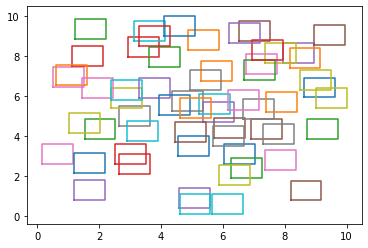

In [9]:
seznam_slik = []
for i in range(0,len(seznam_tock)):
    tocka = seznam_tock[i]
    seznam_slik.append(generiranje_kvadrata(tocka))

for slika in seznam_slik:    #to pokaže končno sliko vseh zgenereranih enotskih kvadratov
     plt.plot()
plt.show()